In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
loandf=pd.read_csv('6 loan_prediction.csv')
loandf.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
loandf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
loandf.shape

(614, 13)

In [6]:
loandf.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
loandf.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [8]:
# Let us check the unique values in each column

for i in loandf:
    print('No of unique values for {} is : {}'. format(i, str(loandf[i].nunique())))

No of unique values for Loan_ID is : 614
No of unique values for Gender is : 2
No of unique values for Married is : 2
No of unique values for Dependents is : 4
No of unique values for Education is : 2
No of unique values for Self_Employed is : 2
No of unique values for ApplicantIncome is : 505
No of unique values for CoapplicantIncome is : 287
No of unique values for LoanAmount is : 203
No of unique values for Loan_Amount_Term is : 10
No of unique values for Credit_History is : 2
No of unique values for Property_Area is : 3
No of unique values for Loan_Status is : 2


In [9]:
# Loan_ID column is highest unique values means high cardinality
# to tackle this high cardinality we can simply drop that column as it is not adding any  values to our dataset

In [10]:
loandf.drop('Loan_ID', axis=1, inplace=True)
loandf.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [11]:
# Lets sepearet our categorical and numerical variables for netter understnading

categorical_features=loandf.select_dtypes(include=[np.object])
categorical_features.head(3)

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y


In [12]:
numerical_features=loandf.select_dtypes(include=[np.number])
numerical_features.head(3)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0


In [13]:
# let us check if we have anu null values


loandf.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

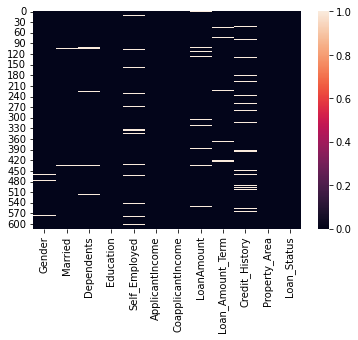

In [14]:
sns.heatmap(loandf.isnull())

In [18]:
from sklearn.impute import SimpleImputer
imp= SimpleImputer(missing_values=np.nan, strategy='mean')

loandf['LoanAmount']=imp.fit_transform(loandf['LoanAmount'].values.reshape(-1,1))
loandf

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [19]:
from sklearn.impute import SimpleImputer
imp= SimpleImputer(missing_values=np.nan, strategy='mean')

loandf['Loan_Amount_Term']=imp.fit_transform(loandf['Loan_Amount_Term'].values.reshape(-1,1))
loandf

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [20]:
from sklearn.impute import SimpleImputer
imp= SimpleImputer(missing_values=np.nan, strategy='mean')

loandf['Credit_History']=imp.fit_transform(loandf['Credit_History'].values.reshape(-1,1))
loandf

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [21]:
from sklearn.impute import SimpleImputer
imp= SimpleImputer(strategy="most_frequent")

loandf['Gender']=imp.fit_transform(loandf['Gender'].values.reshape(-1,1))


In [22]:
from sklearn.impute import SimpleImputer
imp= SimpleImputer(strategy="most_frequent")

loandf['Dependents']=imp.fit_transform(loandf['Dependents'].values.reshape(-1,1))


In [23]:
from sklearn.impute import SimpleImputer
imp= SimpleImputer(strategy="most_frequent")

loandf['Married']=imp.fit_transform(loandf['Married'].values.reshape(-1,1))


In [24]:
from sklearn.impute import SimpleImputer
imp= SimpleImputer(strategy="most_frequent")

loandf['Self_Employed']=imp.fit_transform(loandf['Self_Employed'].values.reshape(-1,1))
loandf


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [25]:
loandf.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<AxesSubplot:>

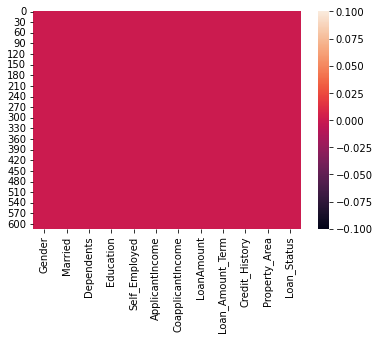

In [27]:
sns.heatmap(loandf.isnull())

In [26]:
loandf.shape

(614, 12)

In [29]:
loandf.drop_duplicates()
loandf.head(3)


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y


# Data Visualiztion

ApplicantIncome         AxesSubplot(0.125,0.536818;0.110714x0.343182)
CoapplicantIncome    AxesSubplot(0.257857,0.536818;0.110714x0.343182)
LoanAmount           AxesSubplot(0.390714,0.536818;0.110714x0.343182)
Loan_Amount_Term     AxesSubplot(0.523571,0.536818;0.110714x0.343182)
Credit_History       AxesSubplot(0.656429,0.536818;0.110714x0.343182)
dtype: object

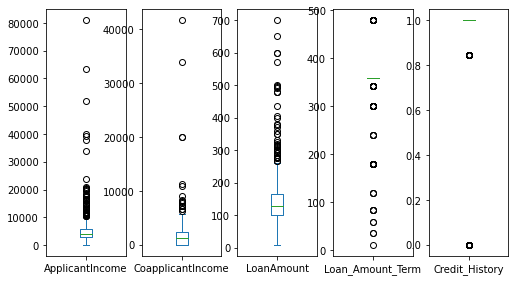

In [30]:
loandf.plot(kind='box' , subplots=True, layout=(2,6), figsize=(10,10))

In [31]:
# countplot for the categorical variables

<AxesSubplot:xlabel='Gender', ylabel='count'>

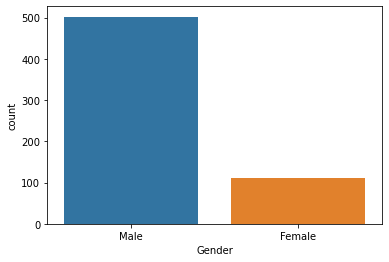

In [33]:
sns.countplot(x='Gender', data=loandf)

<AxesSubplot:xlabel='Dependents', ylabel='count'>

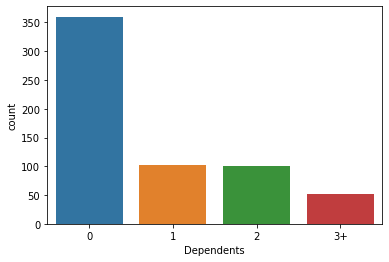

In [34]:
sns.countplot(x='Dependents', data=loandf)

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

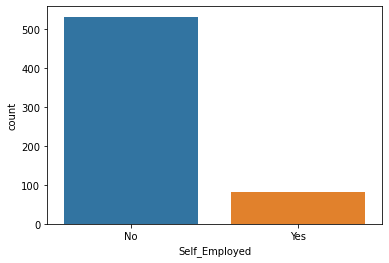

In [35]:
sns.countplot(x='Self_Employed', data=loandf)

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

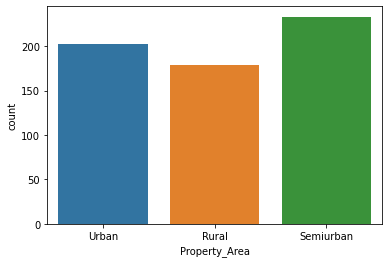

In [36]:
sns.countplot(x='Property_Area', data=loandf)

<AxesSubplot:xlabel='Education', ylabel='count'>

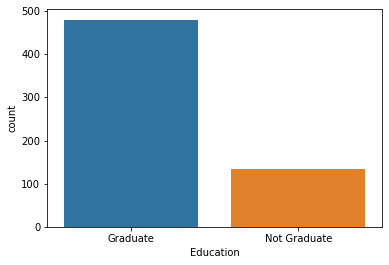

In [37]:
sns.countplot(x='Education', data=loandf)

Y    422
N    192
Name: Loan_Status, dtype: int64

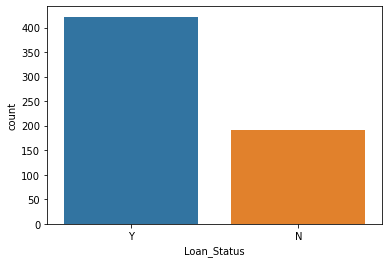

In [41]:
# Target Variable


sns.countplot(x='Loan_Status', data=loandf)
loandf['Loan_Status'].value_counts()

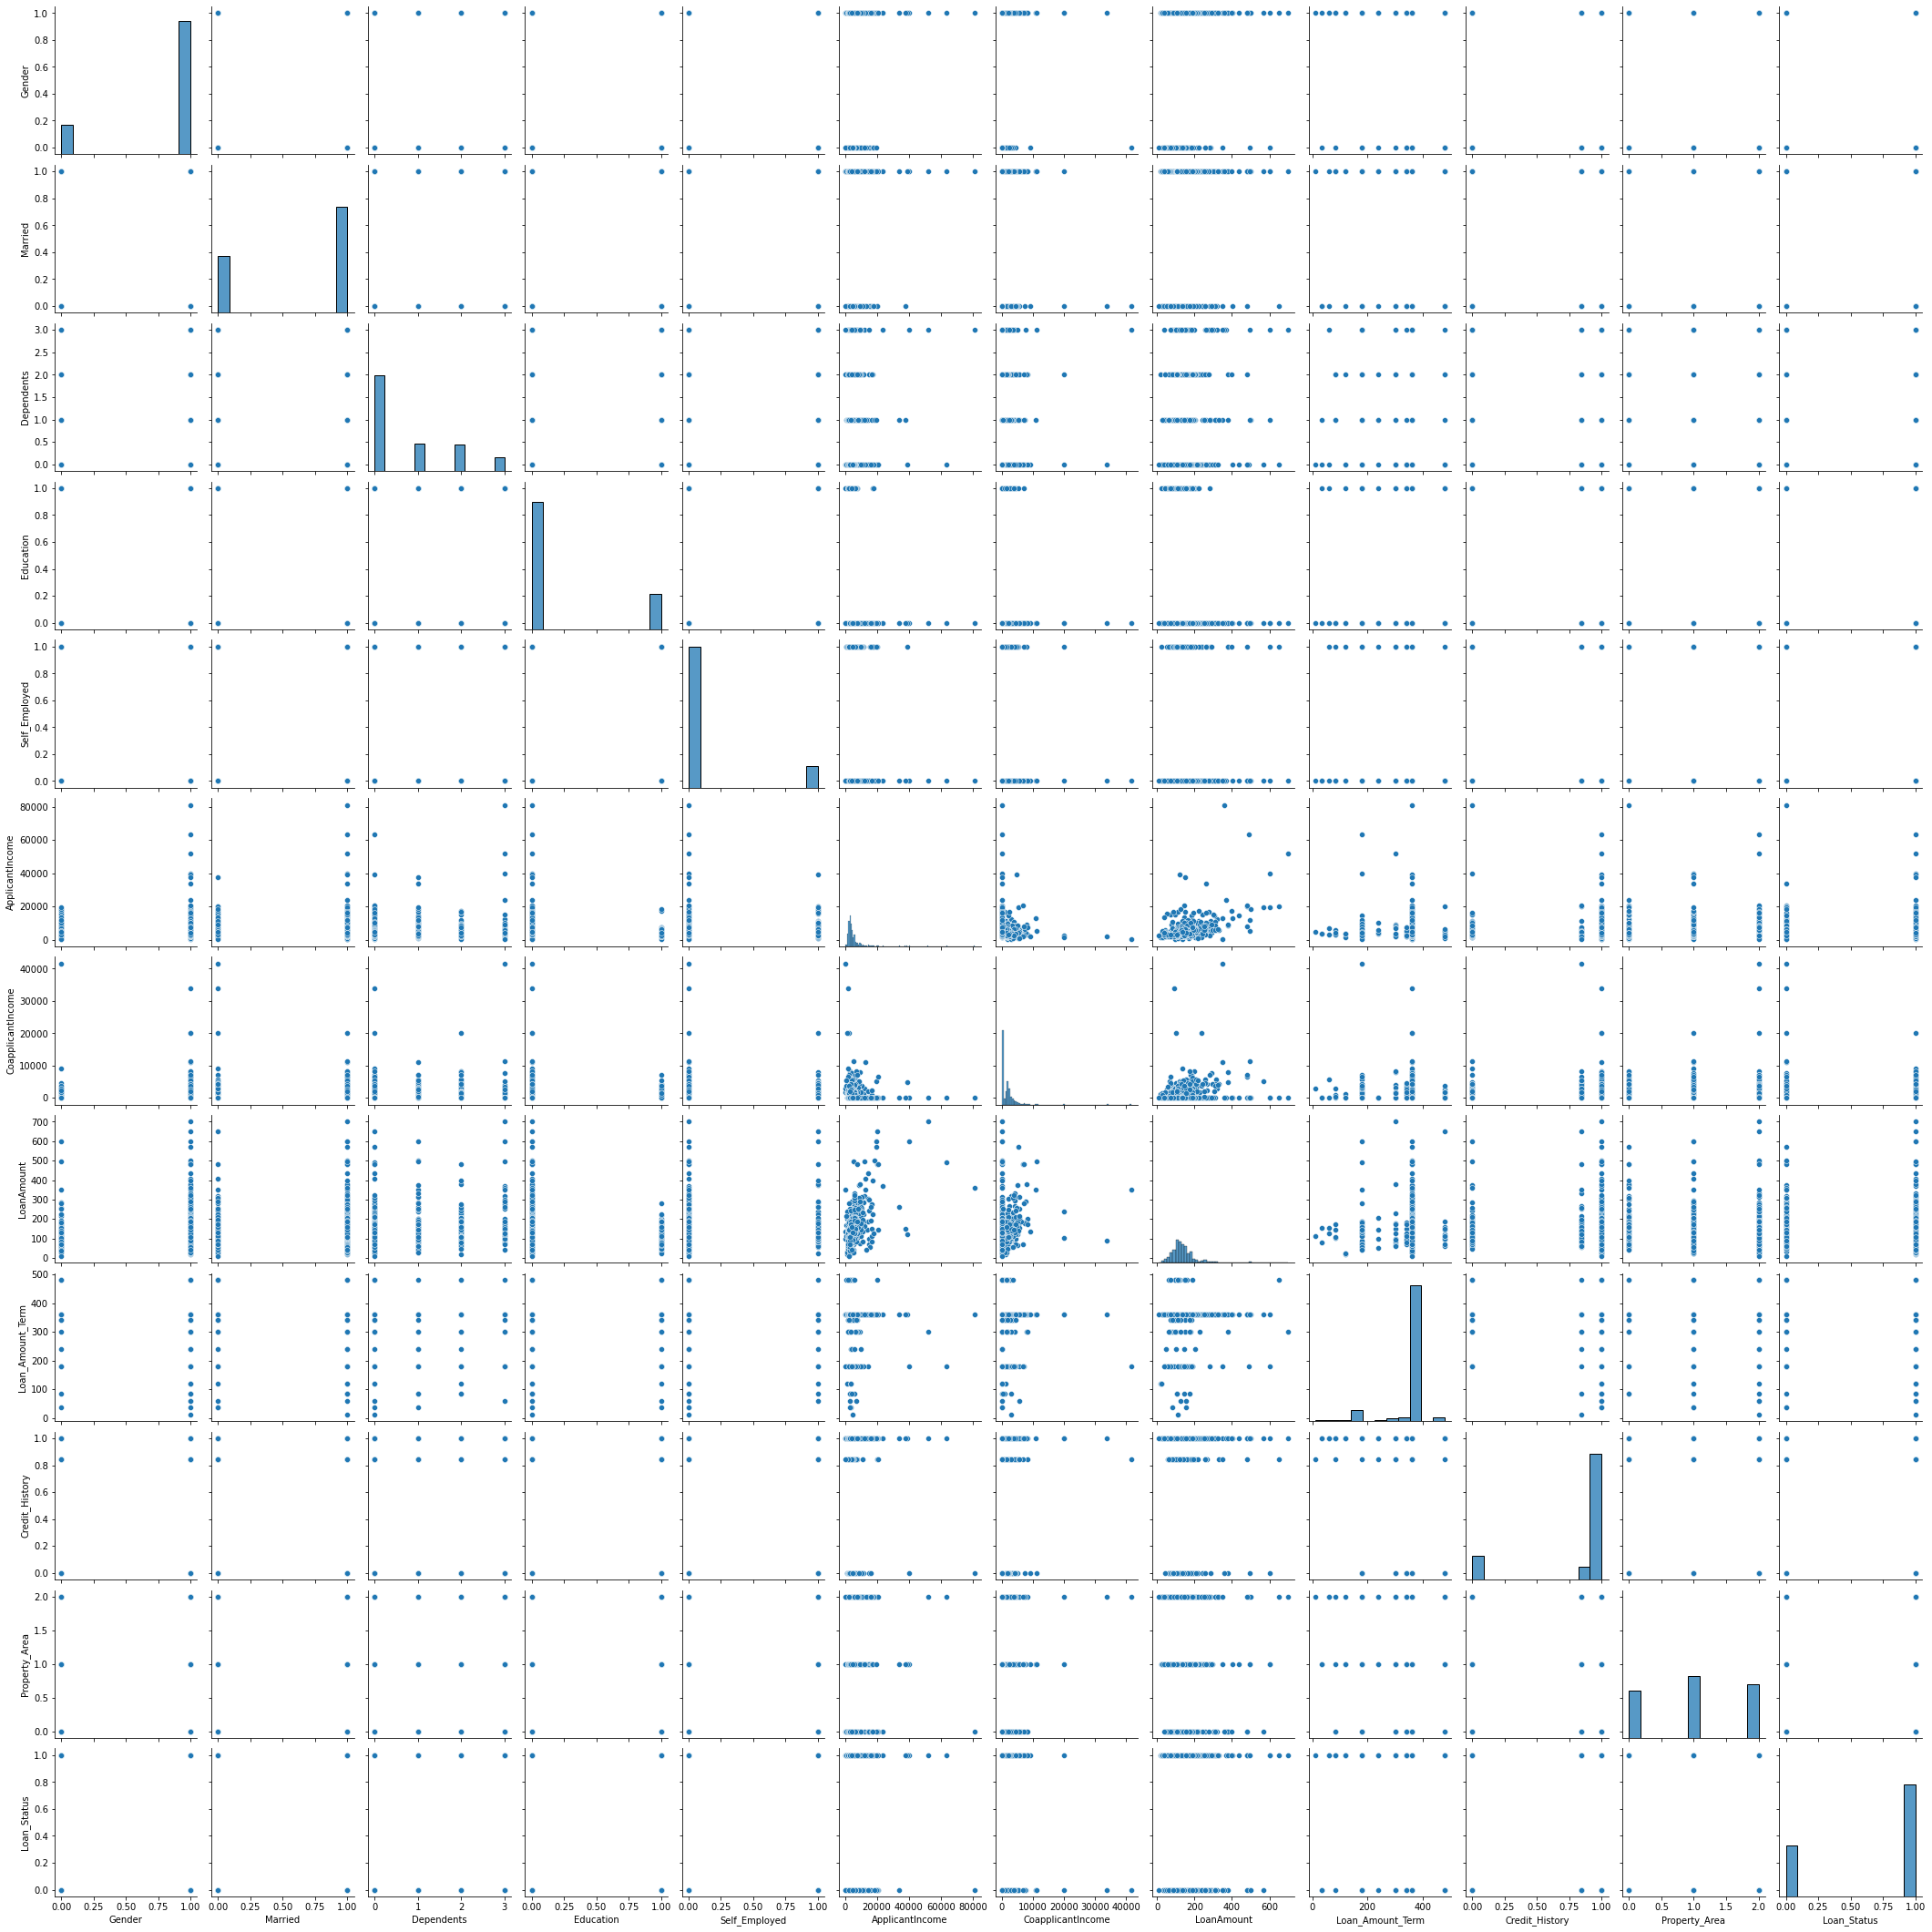

In [48]:
sns.pairplot(loandf)

In [42]:
loandf.Loan_Status.unique()

array(['Y', 'N'], dtype=object)

The above dataset has lot of string or object variable so we will use Encoding techniques totransfrom the data to numerical one.

In [45]:
# Encoding the dataset

import sklearn
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [46]:
for i in loandf.columns:
    if loandf[i].dtypes=='object':
        loandf[i]=enc.fit_transform(loandf[i].values.reshape(-1,1))

In [47]:
loandf.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,0.0,0.0,5849,0.0,146.412162,360.0,1.0,2.0,1.0
1,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.000000,360.0,1.0,0.0,0.0
2,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.000000,360.0,1.0,2.0,1.0
3,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.000000,360.0,1.0,2.0,1.0
4,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.000000,360.0,1.0,2.0,1.0


In [61]:
# Check correlation

In [62]:
loandf.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.107930,-0.073567,0.012819,-0.025752,0.017987
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.147141,-0.100863,0.005852,0.004257,0.091478
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163106,-0.101054,-0.037392,-0.000244,0.010118
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.166998,-0.077242,-0.077936,-0.065243,-0.085884
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115260,-0.033943,-0.002260,-0.030860,-0.003700
ApplicantIncome,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565620,-0.045242,-0.014477,-0.009500,-0.004710
CoapplicantIncome,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.187828,-0.059675,-0.001665,0.010522,-0.059187
LoanAmount,0.107930,0.147141,0.163106,-0.166998,0.115260,0.565620,0.187828,1.000000,0.038801,-0.007738,-0.044776,-0.036416
Loan_Amount_Term,-0.073567,-0.100863,-0.101054,-0.077242,-0.033943,-0.045242,-0.059675,0.038801,1.000000,0.001395,-0.077620,-0.020974
Credit_History,0.012819,0.005852,-0.037392,-0.077936,-0.002260,-0.014477,-0.001665,-0.007738,0.001395,1.000000,-0.001880,0.540483


In [63]:
loandf.corr()['Loan_Status'].sort_values()

Education           -0.085884
CoapplicantIncome   -0.059187
LoanAmount          -0.036416
Loan_Amount_Term    -0.020974
ApplicantIncome     -0.004710
Self_Employed       -0.003700
Dependents           0.010118
Gender               0.017987
Property_Area        0.032112
Married              0.091478
Credit_History       0.540483
Loan_Status          1.000000
Name: Loan_Status, dtype: float64

<AxesSubplot:>

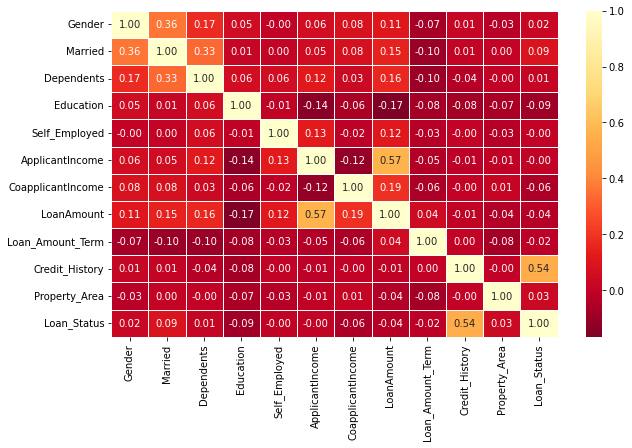

In [64]:
plt.figure(figsize=(10,6))
sns.heatmap(loandf.corr(),cmap= 'YlOrRd_r', linewidth=0.5, annot=True, fmt='.2f')

In [65]:
# Summary statistics

In [67]:
loandf.describe()
round(loandf.describe()[1:].transpose(),2)

,mean,std,min,25%,50%,75%,max
Gender,0.82,0.39,0.0,1.00,1.0,1.00,1.0
Married,0.65,0.48,0.0,0.00,1.0,1.00,1.0
Dependents,0.74,1.01,0.0,0.00,0.0,1.00,3.0
Education,0.22,0.41,0.0,0.00,0.0,0.00,1.0
Self_Employed,0.13,0.34,0.0,0.00,0.0,0.00,1.0
ApplicantIncome,5403.46,6109.04,150.0,2877.50,3812.5,5795.00,81000.0
CoapplicantIncome,1621.25,2926.25,0.0,0.00,1188.5,2297.25,41667.0
LoanAmount,146.41,84.04,9.0,100.25,129.0,164.75,700.0
Loan_Amount_Term,342.00,64.37,12.0,360.00,360.0,360.00,480.0
Credit_History,0.84,0.35,0.0,1.00,1.0,1.00,1.0


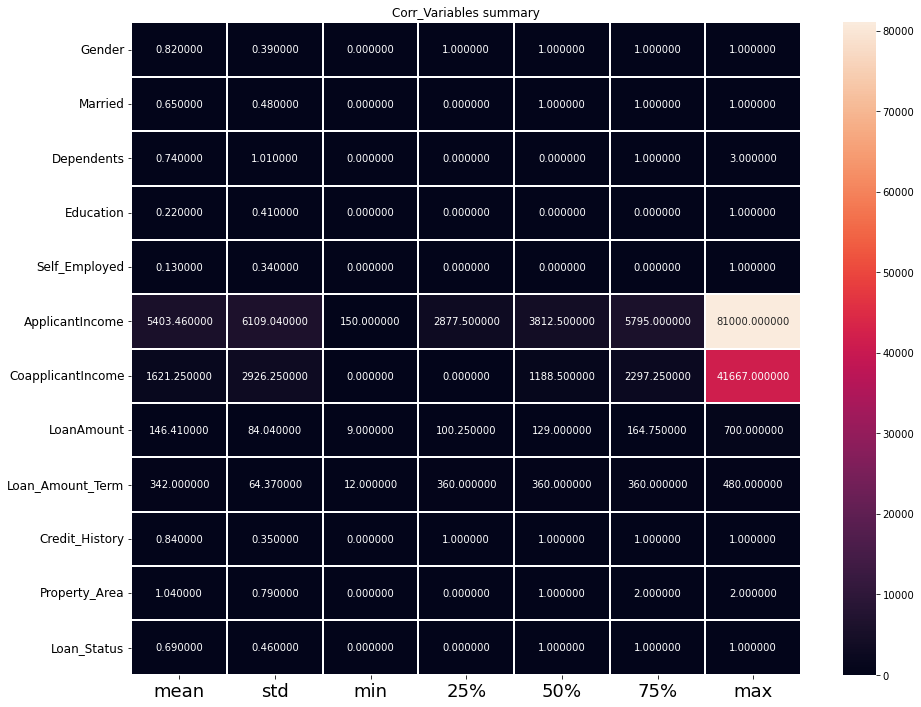

In [68]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,12))
sns.heatmap(round(loandf.describe()[1:].transpose(),2), linewidth=2, annot=True, fmt='f')
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title('Corr_Variables summary')
plt.savefig('heatmap.png')
plt.show()

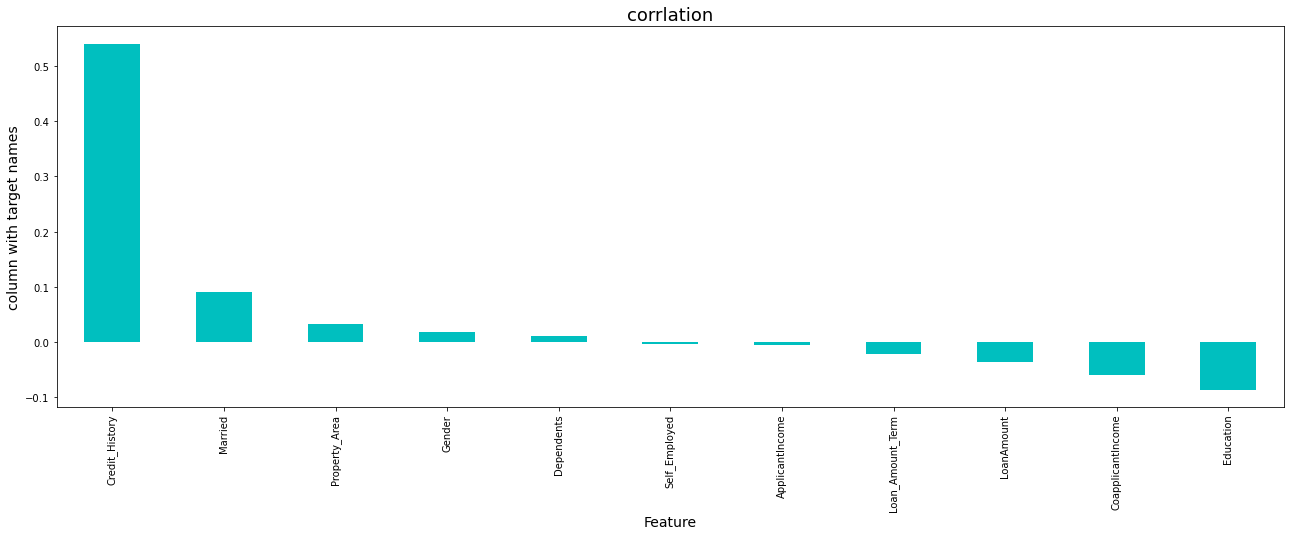

In [79]:
plt.figure(figsize=(22,7))
loandf.corr()['Loan_Status'].sort_values(ascending=False).drop(['Loan_Status']).plot(kind='bar', color='c')
plt.xlabel('Feature', fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('corrlation', fontsize=18)
plt.show()

In [69]:
# Check skewness

loandf.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -1.963600
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

In [70]:
# Normal distribution curve

<AxesSubplot:xlabel='Gender', ylabel='Density'>

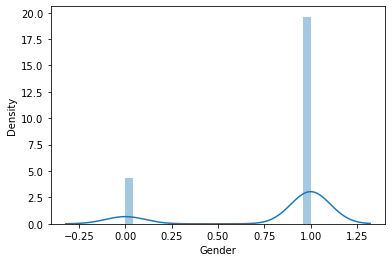

In [72]:
sns.distplot(loandf['Gender'])

<AxesSubplot:xlabel='Married', ylabel='Density'>

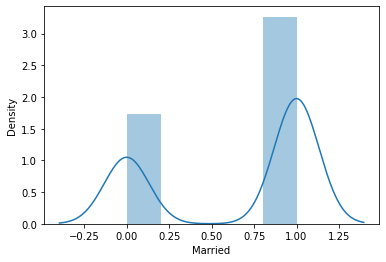

In [73]:
sns.distplot(loandf['Married'])

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

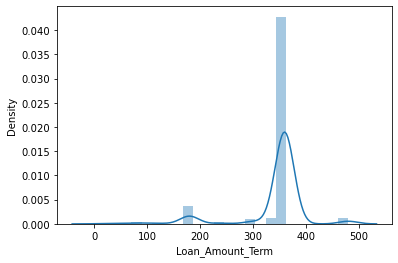

In [74]:
sns.distplot(loandf['Loan_Amount_Term'])

<AxesSubplot:xlabel='Credit_History', ylabel='Density'>

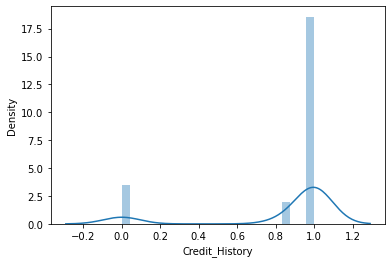

In [75]:
sns.distplot(loandf['Credit_History'])

<AxesSubplot:xlabel='Property_Area', ylabel='Density'>

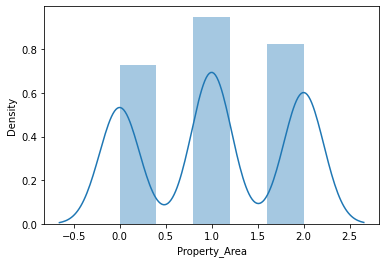

In [76]:
sns.distplot(loandf['Property_Area'])

<AxesSubplot:xlabel='Loan_Status', ylabel='Density'>

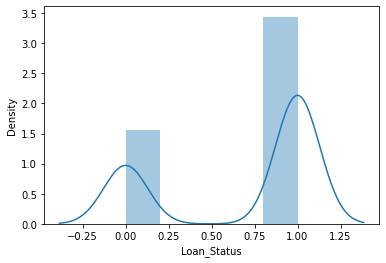

In [77]:
sns.distplot(loandf['Loan_Status'])

In [78]:
# The Normal distribution curve shows that the Data is skewed.

# Lets remove the outliers

In [50]:
from scipy.stats import zscore

In [51]:
zscore(loandf)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.072991,-0.554487,0.000000,0.279851,0.451640,1.223298,0.674519
1,0.472343,0.728816,0.253470,-0.528362,-0.392601,-0.134412,-0.038732,-0.219273,0.279851,0.451640,-1.318513,-1.482537
2,0.472343,0.728816,-0.737806,-0.528362,2.547117,-0.393747,-0.554487,-0.957641,0.279851,0.451640,1.223298,0.674519
3,0.472343,0.728816,-0.737806,1.892641,-0.392601,-0.462062,0.251980,-0.314547,0.279851,0.451640,1.223298,0.674519
4,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.097728,-0.554487,-0.064454,0.279851,0.451640,1.223298,0.674519
...,...,...,...,...,...,...,...,...,...,...,...,...
609,-2.117107,-1.372089,-0.737806,-0.528362,-0.392601,-0.410130,-0.554487,-0.898095,0.279851,0.451640,-1.318513,0.674519
610,0.472343,0.728816,2.236021,-0.528362,-0.392601,-0.212557,-0.554487,-1.267279,-2.518655,0.451640,-1.318513,0.674519
611,0.472343,0.728816,0.253470,-0.528362,-0.392601,0.437174,-0.472404,1.269371,0.279851,0.451640,1.223298,0.674519
612,0.472343,0.728816,1.244745,-0.528362,-0.392601,0.357064,-0.554487,0.483367,0.279851,0.451640,1.223298,0.674519


In [53]:
import numpy as np
z=np.abs(zscore(loandf))
z.shape

(614, 12)

In [54]:
thershold=3
print(np.where(z>3))

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
       183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
       432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
       600, 604], dtype=int64), array([6, 8, 8, 8, 5, 7, 8, 5, 7, 5, 7, 6, 7, 5, 5, 8, 8, 7, 7, 8, 5, 7,
       7, 6, 5, 6, 7, 5, 7, 8, 8, 7, 7, 7, 8, 7, 8, 6, 8, 6, 7],
      dtype=int64))


In [55]:
# total rows of dataloss

len(np.where(z>3)[0])

41

In [56]:
df_new=loandf[(z<3).all(axis=1)]
df_new

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,0.0,0.0,5849,0.0,146.412162,360.0,1.0,2.0,1.0
1,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.000000,360.0,1.0,0.0,0.0
2,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.000000,360.0,1.0,2.0,1.0
3,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.000000,360.0,1.0,2.0,1.0
4,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.000000,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,0.0,0.0,2900,0.0,71.000000,360.0,1.0,0.0,1.0
610,1.0,1.0,3.0,0.0,0.0,4106,0.0,40.000000,180.0,1.0,0.0,1.0
611,1.0,1.0,1.0,0.0,0.0,8072,240.0,253.000000,360.0,1.0,2.0,1.0
612,1.0,1.0,2.0,0.0,0.0,7583,0.0,187.000000,360.0,1.0,2.0,1.0


In [57]:
print('Old Dataframe', loandf.shape)
print('New datagrame', df_new.shape)
print('Total_Dropped_rows', loandf.shape[0] - df_new.shape[0])

Old Dataframe (614, 12)
New datagrame (577, 12)
Total_Dropped_rows 37


In [58]:
loandf.shape

(614, 12)

In [59]:
df_new.shape

(577, 12)

In [60]:
#percentage data loss

loss_percent= (614-577)/614*100
print(loss_percent)

6.026058631921824


Total 37 rows were deleted as outliers
Data without outliers is loandf and Dataset with desired outliers is df_new

Balance the data by Removing skewness

In [81]:
# Let us Seperate the data x and y

In [83]:
# independent variables

x=df_new.iloc[:,:-1]
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,0.0,0.0,0.0,0.0,5849,0.0,146.412162,360.0,1.0,2.0
1,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.000000,360.0,1.0,0.0
2,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.000000,360.0,1.0,2.0
3,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.000000,360.0,1.0,2.0
4,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.000000,360.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,0.0,0.0,2900,0.0,71.000000,360.0,1.0,0.0
610,1.0,1.0,3.0,0.0,0.0,4106,0.0,40.000000,180.0,1.0,0.0
611,1.0,1.0,1.0,0.0,0.0,8072,240.0,253.000000,360.0,1.0,2.0
612,1.0,1.0,2.0,0.0,0.0,7583,0.0,187.000000,360.0,1.0,2.0


In [84]:
# target column

y=df_new.iloc[:,-1]
y

0      1.0
1      0.0
2      1.0
3      1.0
4      1.0
      ... 
609    1.0
610    1.0
611    1.0
612    1.0
613    0.0
Name: Loan_Status, Length: 577, dtype: float64

In [93]:
df_new.shape

(577, 12)

In [80]:
import sklearn
from sklearn.preprocessing import power_transform

In [85]:
x=power_transform(x)

In [86]:
type(x)

numpy.ndarray

In [87]:
x

array([[ 0.47713685, -1.36251079, -0.80924269, ...,  0.14260892,
         0.51523634,  1.1948064 ],
       [ 0.47713685,  0.73393914,  0.90286851, ...,  0.14260892,
         0.51523634, -1.34019905],
       [ 0.47713685,  0.73393914, -0.80924269, ...,  0.14260892,
         0.51523634,  1.1948064 ],
       ...,
       [ 0.47713685,  0.73393914,  0.90286851, ...,  0.14260892,
         0.51523634,  1.1948064 ],
       [ 0.47713685,  0.73393914,  1.34467098, ...,  0.14260892,
         0.51523634,  1.1948064 ],
       [-2.09583477, -1.36251079, -0.80924269, ...,  0.14260892,
        -2.22500746,  0.01546372]])

In [88]:
x.ndim

2

In [89]:
x.mean()

2.4488927595324076e-17

In [90]:
x.std()

1.0

std =1.0 means data is standardised

# Model Building

In [91]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.20, random_state=0)

In [92]:
print(" x_train df_new: ", x_train.shape)
print(" y_train df_new: ", y_train.shape)
print(" x_test df_new: ", x_test.shape)
print(" y_test df_new: ", y_test.shape)

 x_train df_new:  (461, 11)
 y_train df_new:  (461,)
 x_test df_new:  (116, 11)
 y_test df_new:  (116,)


In [94]:
from sklearn import model_selection
from sklearn import metrics

from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, gaussian_process
from sklearn.neighbors import KNeighborsClassifier


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [95]:
# sklearn modules for Model evaluation and improvement

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import f1_score,precision_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

from sklearn import feature_selection
from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import average_precision_score

In [96]:
logr=LogisticRegression()
dtc=DecisionTreeClassifier()
svc=SVC()
gnb=GaussianNB()
knn=KNeighborsClassifier()
rfc=RandomForestClassifier()
gbc=GradientBoostingClassifier()


model=[logr,dtc,svc,gnb,knn,rfc,gbc]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy score of ', m, 'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print(precision_recall_curve(y_test,predm))
    print('\n')

Accuracy score of  LogisticRegression() is:
0.7672413793103449
[[18 21]
 [ 6 71]]
              precision    recall  f1-score   support

         0.0       0.75      0.46      0.57        39
         1.0       0.77      0.92      0.84        77

    accuracy                           0.77       116
   macro avg       0.76      0.69      0.71       116
weighted avg       0.76      0.77      0.75       116

(array([0.6637931 , 0.77173913, 1.        ]), array([1.        , 0.92207792, 0.        ]), array([0., 1.]))


Accuracy score of  DecisionTreeClassifier() is:
0.6810344827586207
[[24 15]
 [22 55]]
              precision    recall  f1-score   support

         0.0       0.52      0.62      0.56        39
         1.0       0.79      0.71      0.75        77

    accuracy                           0.68       116
   macro avg       0.65      0.66      0.66       116
weighted avg       0.70      0.68      0.69       116

(array([0.6637931 , 0.78571429, 1.        ]), array([1.        , 0.7

In [97]:
predm

array([1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [98]:
# checking Cross validation scores for all models

In [99]:
score=cross_val_score(gnb,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.79310345 0.74137931 0.74782609 0.80869565 0.7826087 ]
0.7747226386806597
0.026036173839126812


In [100]:
score=cross_val_score(svc,x,y,cv=10)
print(score)
print(score.mean())
print(score.std())

[0.81034483 0.81034483 0.81034483 0.75862069 0.77586207 0.77586207
 0.87931034 0.8245614  0.77192982 0.85964912]
0.8076830006049607
0.03721240933353123


In [101]:
score=cross_val_score(dtc,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.71551724 0.69827586 0.72173913 0.66086957 0.67826087]
0.6949325337331334
0.022767221482635266


In [102]:
score=cross_val_score(knn,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.76724138 0.75       0.74782609 0.8173913  0.7826087 ]
0.7730134932533733
0.025529597073459386


In [104]:
score=cross_val_score(logr,x,y,cv=10)
print(score)
print(score.mean())
print(score.std())

[0.77586207 0.79310345 0.77586207 0.77586207 0.77586207 0.74137931
 0.84482759 0.84210526 0.75438596 0.87719298]
0.7956442831215971
0.04176906301651435


In [105]:
score=cross_val_score(rfc,x,y,cv=10)
print(score)
print(score.mean())
print(score.std())

[0.81034483 0.79310345 0.79310345 0.75862069 0.75862069 0.77586207
 0.82758621 0.80701754 0.77192982 0.87719298]
0.7973381730187536
0.03419847579442167


In [106]:
# to improve the model we will use adaoost classifer

In [107]:
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier(n_estimators=50)
ad.fit(x_train,y_train)
ad_pred=ad.predict(x_test)
print(accuracy_score(y_test,ad_pred))
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

0.7844827586206896
[[19 20]
 [ 5 72]]
              precision    recall  f1-score   support

         0.0       0.79      0.49      0.60        39
         1.0       0.78      0.94      0.85        77

    accuracy                           0.78       116
   macro avg       0.79      0.71      0.73       116
weighted avg       0.79      0.78      0.77       116



In [112]:
classifier = LogisticRegression(random_state = 0,
penalty = 'none') 

classifier.fit(x_train, y_train)

# Predict the Test set results
predm= classifier.predict(x_test)

#Evaluate Model Results on Test Set:
acc = accuracy_score(y_test, predm )
prec = precision_score(y_test, predm )
f1 = f1_score(y_test, predm)

results = pd.DataFrame([['Logistic Regression',
acc, prec, f1]],columns = ['Model', 'Accuracy', 'Precision', 'F1 Score',])
print (results)

                 Model  Accuracy  Precision  F1 Score
0  Logistic Regression  0.767241   0.771739  0.840237


In [113]:
classifier = LogisticRegression(random_state = 0,
penalty = 'l2') 

classifier.fit(x_train, y_train)

# Predict the Test set results
predm1 = classifier.predict(x_test)

#Evaluate Model Results on Test Set:
acc = accuracy_score(y_test, predm1)
prec = precision_score(y_test, predm1 )
f1 = f1_score(y_test, predm1 )

results = pd.DataFrame([['Logistic Regression',
acc, prec, f1]],columns = ['Model', 'Accuracy', 'Precision', 'F1 Score',])
print (results)

                 Model  Accuracy  Precision  F1 Score
0  Logistic Regression  0.767241   0.771739  0.840237


In [114]:
# Confusion Matrix

Text(0.5, 16.0, 'Predicted label\n')

<Figure size 2016x1440 with 0 Axes>

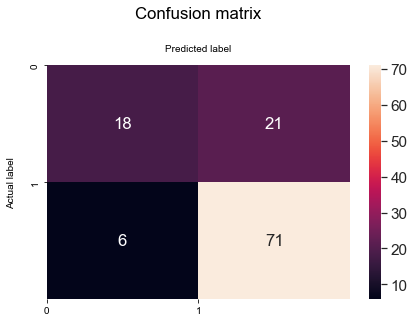

In [115]:
cm = confusion_matrix(y_test, predm) 
df_new_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))
fig, ax = plt.subplots()
sns.set(font_scale=1.4)
sns.heatmap(df_new_cm, annot=True, fmt='g'#,cmap="YlGnBu" 
           )
class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')

In [116]:
# ROC Graph

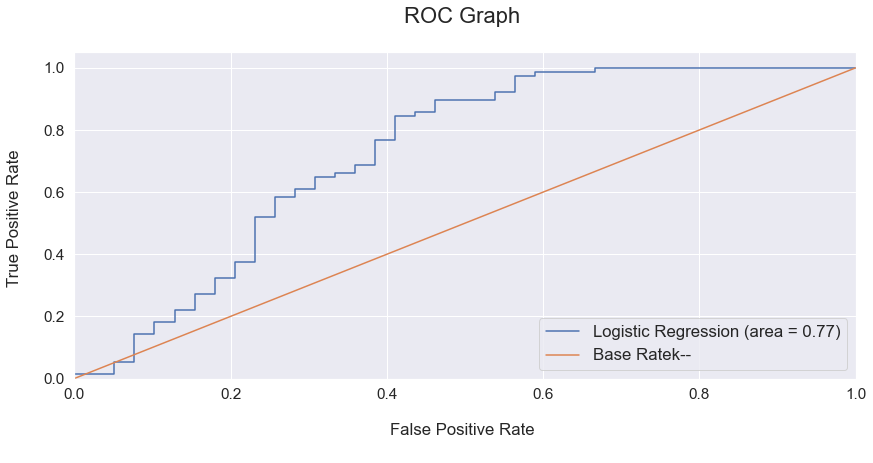

In [117]:
classifier.fit(x_train, y_train) 
probs = classifier.predict_proba(x_test) 
probs = probs[:, 1] 
classifier_roc_auc = accuracy_score(y_test, predm )
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, classifier.predict_proba(x_test)[:,1])
plt.figure(figsize=(14, 6)) 

# Plot Logistic Regression ROC
plt.plot(rf_fpr, rf_tpr, 
label='Logistic Regression (area = %0.2f)' % classifier_roc_auc)

# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.ylabel('True Positive Rate \n',horizontalalignment="center",
fontstyle = "normal", fontsize = "medium", 
fontfamily = "sans-serif")
plt.xlabel('\nFalse Positive Rate \n',horizontalalignment="center",
fontstyle = "normal", fontsize = "medium", 
fontfamily = "sans-serif")
plt.title('ROC Graph \n',horizontalalignment="center", 
fontstyle = "normal", fontsize = "22", 
fontfamily = "sans-serif")
plt.legend(loc="lower right", fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

Hyperparameter Tuning using Gridsearch cv

In [118]:
# Select Regularization Method
import time
penalty = ['l2']

# Create regularization hyperparameter space
C = [ 0.0001, 0.001, 0.01, 0.02, 0.05]

# Combine Parameters
parameters = dict(C=C, penalty=penalty)
logr_classifier = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = "balanced_accuracy",
                           cv = 10,
                           n_jobs = -1)
t0 = time.time()
logr_classifier  = logr_classifier .fit(x_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))
logr_best_accuracy = logr_classifier.best_score_
logr_best_parameters = logr_classifier.best_params_
logr_best_accuracy, logr_best_parameters

Took 44.90 seconds


(0.721300054112554, {'C': 0.02, 'penalty': 'l2'})

Final Hyperparameter tuning and selection

In [119]:
logr_classifier = LogisticRegression(random_state = 0, penalty = 'l2')
logr_classifier.fit(x_train, y_train)

# Predict the Test set results
predm = logr_classifier.predict(x_test)

#probability score
predm_probs = logr_classifier.predict_proba(x_test)
predm_probs  = predm_probs [:, 1]

[[18 21]
 [ 6 71]]
Test Data Accuracy: 0.7672


<Figure size 2016x1440 with 0 Axes>

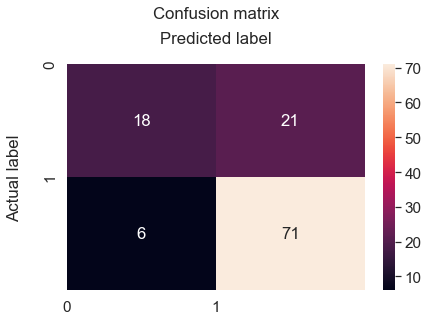

In [120]:
#Revalidate final results with Confusion Matrix:
cm = confusion_matrix(y_test, predm) 
print (cm)
#Confusion Matrix as a quick Crosstab:
    
pd.crosstab(y_test,pd.Series(predm),
rownames=['ACTUAL'],colnames=['PRED'])

#visualize Confusion Matrix:
cm = confusion_matrix(y_test, predm) 
df_new_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))
fig, ax = plt.subplots()
sns.set(font_scale=1.4)
sns.heatmap(df_new_cm, annot=True, fmt='g'#,cmap="YlGnBu" 
           )
class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, predm))

# Saving the Model

In [121]:
import pickle
filename='picklelrfile.pkl'
pickle.dump(logr,open(filename, 'wb'))

In [122]:
loaded_model=pickle.load(open(filename, 'rb'))
loaded_model.predict(x_test)

array([1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0.])

Conclusion: Logistic regression is performing better